In [41]:
# 加载npy文件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = np.load('./results/informer_WTH_ftMS_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/pred.npy')
print(data1.shape)

data2 = np.load('./results/informer_WTH_ftMS_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1/true.npy')
print(data2.shape)

(3360, 96, 1)
(3360, 96, 1)


In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
data2.shape[0]

3360

In [80]:
data1_min = np.min(data1)
data1_max = np.max(data1)
data1 = (data1 - data1_min) / (data1_max - data1_min)

data2_min = np.min(data2)
data2_max = np.max(data2)
data2 = (data2 - data2_min) / (data2_max - data2_min)

In [81]:
best_i = 0
mae = float('inf')
for i in range(data1.shape[0]):
    tmp = mean_absolute_error(data1[i], data2[i])
    if tmp < mae:
        best_i = i
        mae = tmp
print(best_i, mae)


3353 0.042817354


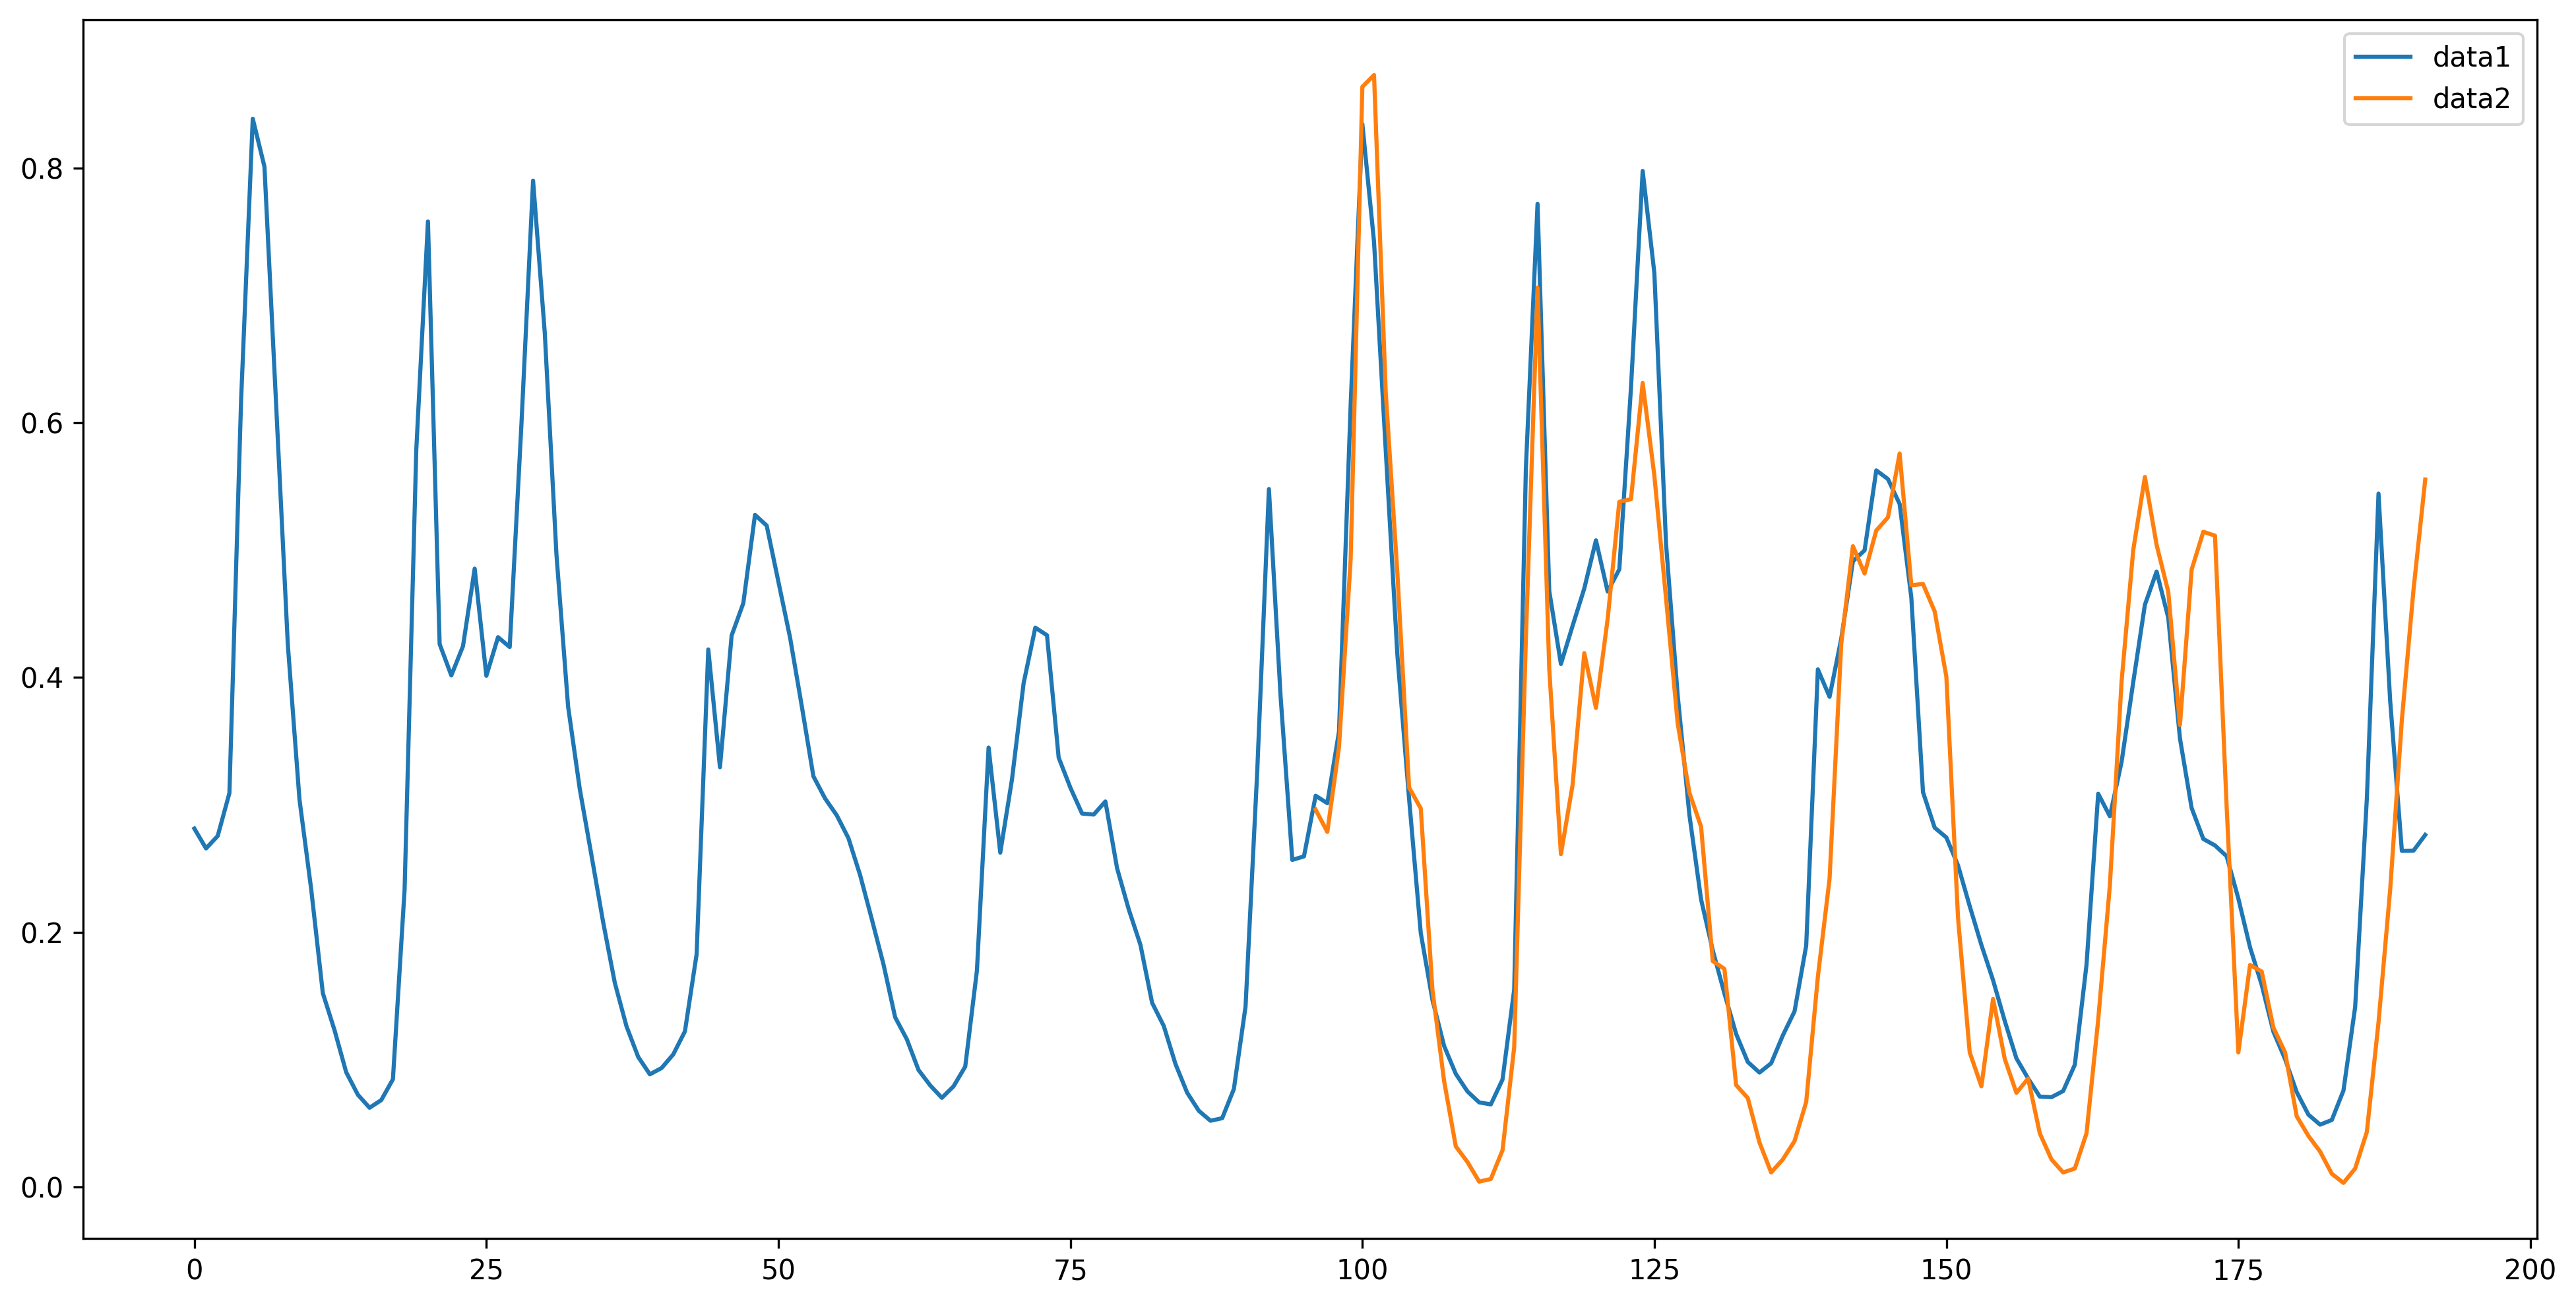

In [82]:
# 将data1和data2画在同一张图上
import matplotlib.pyplot as plt
import numpy as np
j = 555
x1 = [i for i in range(96+96)]
x2 = [i for i in range(96, 96+96)]
data = np.concatenate((data1[j-1], data1[j]))
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(x1,data, label='data1')
plt.plot(x2,data2[j], label='data2')
plt.legend()
plt.show()
